# Week 1: Regression Metrics (Video part 30)


#### Goal:
- Regression:
  - MSE, RMSE, R-squared
  - MAE
  - (R)MSPE, MAPE
  - (R)MSLE
- Classification:
  - Accuracy, Logloss, AUC
  - Cohen's (Quadratic weighted) kappa
 
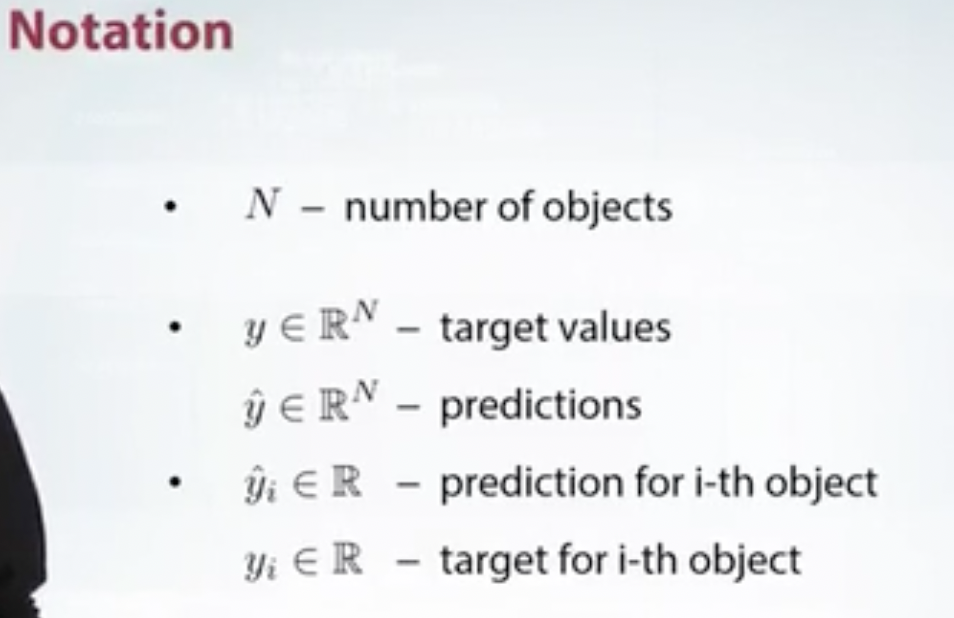


##### MSE
- calculate the squared difference between the prediction and the target, then average those values for all objects

- The constant that is optimal for MSE is the mean target value.

##### RMSE
- Calculate MSE as usual and take square root of it
- Purpose of square root is to make the scale of the error to be the same scale as the target value. This makes it easier to interprete.
- Every minimizer of MSE, is a minimizer of RMSE. So MSE is corresponding to RMSE...
- What does it mean for us? It means that if our target metric is RMSE, we still can compare our models using MSE, since MSE will order the mdoels in the same way as RMSE. And we can optimize MSE instead of RMSE. This is good because MSE is a little easier to work with than RMSE.
- There is a little bit of difference between the MSE and RMSE for gradient-based models.
  - The greadient of RMSE with respect to i-th prediction is basically equal to gradient of MSE multiplied by some value.
  - The value doesn't depend on the index i.
  - This means travelling along MSe gradient is equivalent to traveling along RMSE gradient but with a different learning rate and the learning rate depends on MSE score itself. This makes it dynamic.
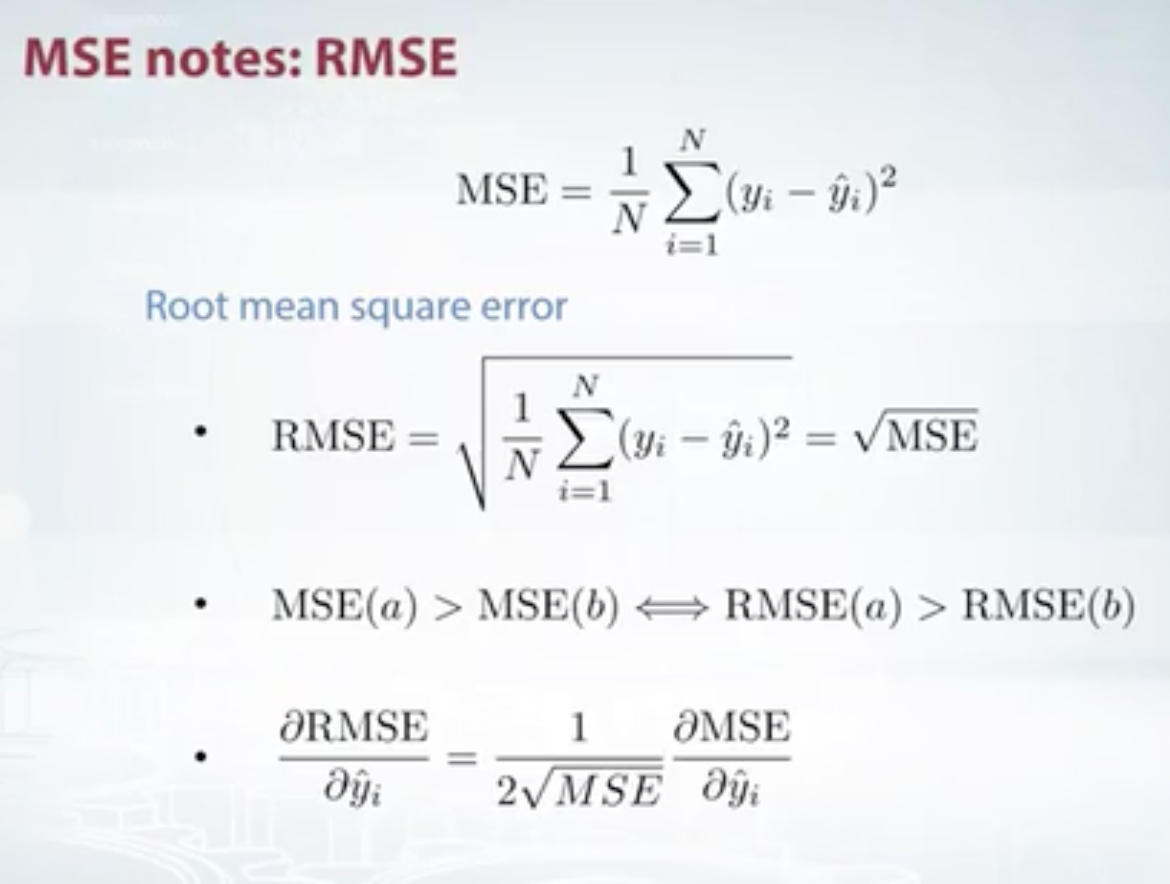
- So even though MSE and RMSE are similar, they might not be directly interchangable for gradient-based models.
  - For this, we might need to adjust some parameters like the learning rate.
- A downside: it is hard to know if our model is good or not by looking at the absolute values of MSE or RMSE.
- It depends on the properties of the dataset and their target vector
  - How much variation is there in the target vector?
  - We should measure how much our model is better than the constant baseline.
  - And the desired metric should give us 0 if we are no better than the baseline, and 1 if the predictions are perfect.
  - For this purpose, R-squared metrics is used. When MSE of our prediction is zero, the R-squared is 1. When MSE is equal to MSE of the constant model, then R-squared is 0.
- In order to optimize R-squared, we can optimize MSE.
 



##### MAE
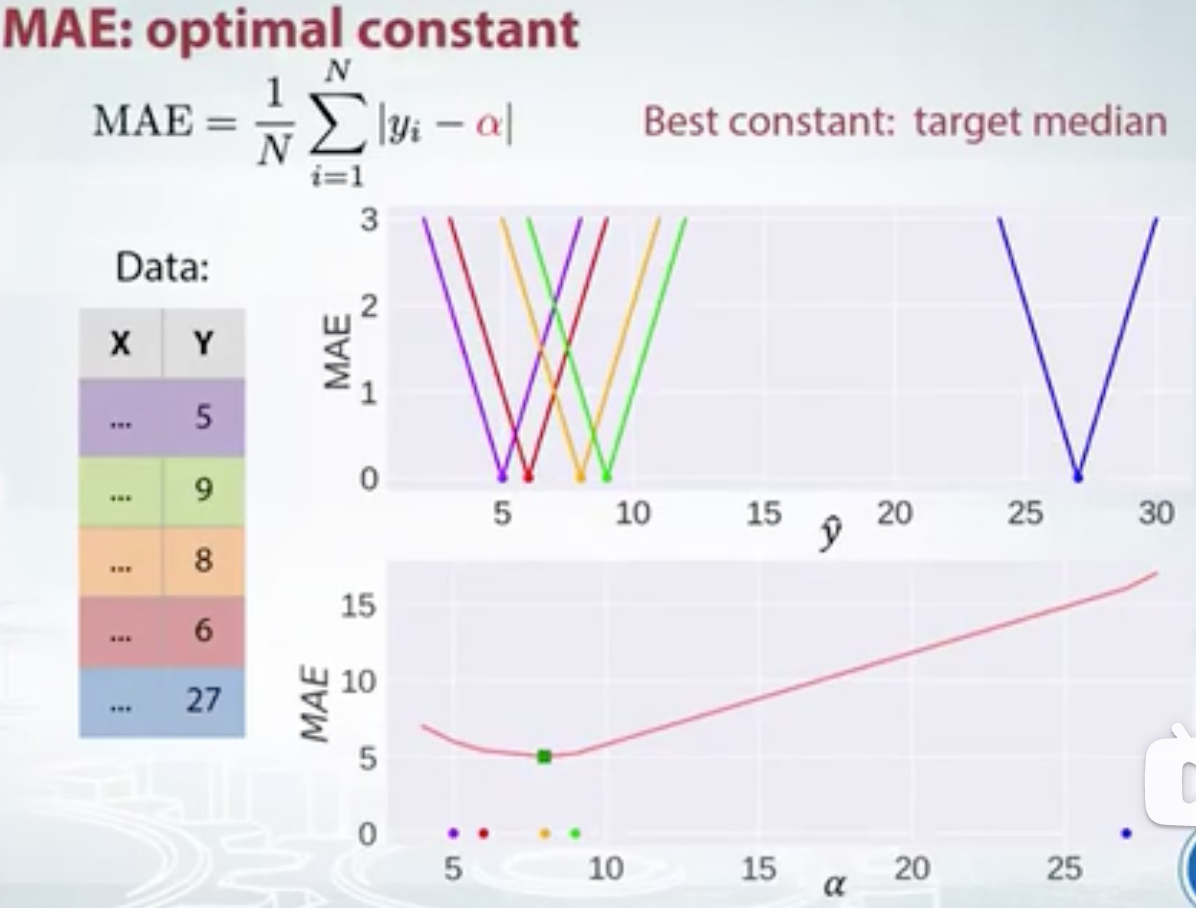
- Error is calculcated as an average of the absolute differences between the target values and the predictions.
- It penalizes huge errors but not as badly as MSE.
- It is not that sensitive to outliers as mean squared error.
- MAE is widely used in finance - where `$10` error is usually exactly two times worse than `$5` error. On the other hand, MSE metric thanks that `$10` error is four times worse than `$5` error.
- The constant that is optimal for MAE is the median target value.
- MAE is more robust than MSE. Not influenced by outliers.

- The gradient for MAE is a step function and it takes -1 when yhat is smaller than the target and +1 when yhat is larger than the target. The gradient is not defined when the prediction is perfect - ie when yhat == y. But how often do the prediction perfectly predict the target? even if they do, we can write a simple if condition to give 0 for such cases, and go through gradients otherwise.
- Also note that the second derivative is zero everywhere.

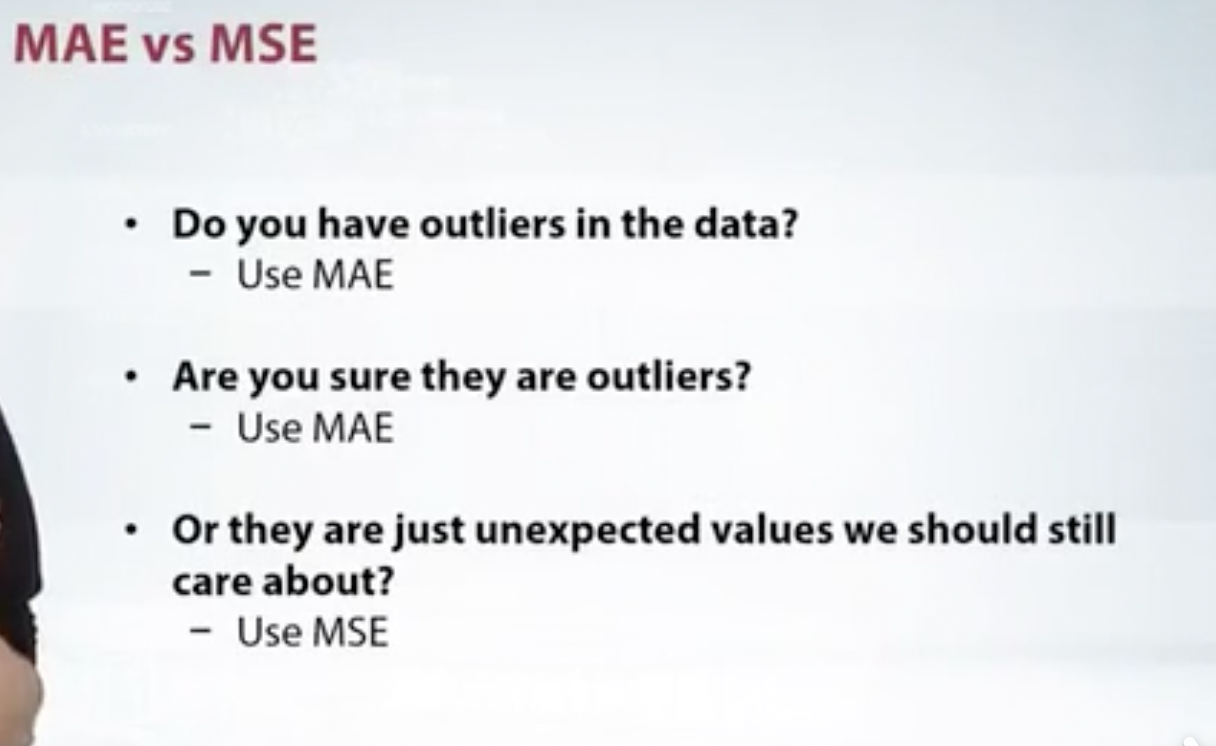

What I learnt:
- MAE is more robust and less sensitive to outliers than MSE.
  - Outliers are usualy mistakes - eg measurement errors, data collection errors etc.
  - But if the 'outliers' in our dataset are actually normal data, in the sense that they're just rare, we should not use a metric which will ignore them. So it is better to use MSE.
  - If otherwise we think they are outliers - we should use MAE.
- Best optimal constant for MSE is mean target values.
- Best optimal constant for MAE is median target values.